In [24]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [25]:
reviews = pd.read_csv('Updated_reviews.csv')

/Users/arensimmons/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (13,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [493]:
#Creating count vectorizer
def make_xy(reviews, column, vectorizer=None):  
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(reviews[column])
    y = reviews['Helpful_review']
    return X, y 

In [189]:
reviews.head()

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,style,summary,verified,vote,...,top_1_pct,review_length,summary_length,year,buckets,review_length_buckets,summary_length_buckets,line_breaks,lemmatized_summaries,lemmatized_reviews
0,0143026860,5.0,Spellbound - I just could not put the book down.,2017-10-23,A1ME71SSJULX11,Vuyokazi,NaN,Spellbound,True,0,...,no,9,1,2017,0,0-50,0-5,0,Spellbound,Spellbound - I just could not put the book down.
1,0143026860,3.0,"Before the written word, stories were passed o...",2015-05-14,A24VCDADYAIHAM,Gridley,NaN,Telling Tales as of Old,True,0,...,no,318,5,2015,0,251-500,0-5,6,Telling Tales a of Old,"Before the write word, story be pass on orally..."
2,0143026860,5.0,"Enjoyed book, written very well",2017-05-26,A1WR0R3LZVUEU3,Addie Woods,NaN,Buy the book,True,0,...,no,5,3,2017,0,0-50,0-5,0,Buy the book,"Enjoyed book, write very well"
3,0143026860,5.0,This was a good story of the Black leagues. I ...,2011-12-25,A6IKXKZMTKGSC,shoecanary,NaN,"More than facts, a good story read!",True,5,...,no,68,7,2011,0,51-100,6-10,0,"More than facts, a good story read!",This be a good story of the Black leagues. I b...
4,0143026860,5.0,okay,2016-09-13,A1QH9MVF3HPZIP,Bicentennial Union High District #76,NaN,Five Stars,True,0,...,no,1,2,2016,0,0-50,0-5,0,Five Stars,okay


In [27]:
reviews = reviews.drop('Unnamed: 0', axis = 1)

In [28]:
reviews['reviewText'] = reviews['reviewText'].astype(str)

In [29]:
reviews['lemmatized_reviews'] = reviews['lemmatized_reviews'].astype(str)

In [377]:
x,y = make_xy(reviews, 'lemmatized_reviews')

In [460]:
X = reviews.drop('Helpful_review', axis = 1)
Y = reviews['Helpful_review'] #Creating X and Y for reviews

In [546]:
test_set_df = reviews[reviews.index.isin(test_index)] 
#Creating a consistent test set to test same sets

In [547]:
training_set_df = reviews[reviews.index.isin(train_index)] 
#Creating a consistent training set so I can use the same training sets 

In [527]:
test_index = list(Y_test.index)

In [535]:
train_index = []

In [545]:
train_index = []
for i in range(0, len(reviews)):
    if rev_ind[i] not in test_index:
        train_index.append(i)

In [546]:
test_set_df = reviews[reviews.index.isin(test_index)]

In [547]:
training_set_df = reviews[reviews.index.isin(train_index)]

I will be creating multiple text classifiers to see which type performs the best.

In [881]:
clf = MultinomialNB()

In [472]:
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [924]:
clf_param_grid = {'alpha': [.1,.5,1]}
clf_NB_CV_overall = GridSearchCV(clf, clf_param_grid, cv = 5).fit(x[train_index], y[train_index])

In [35]:
from sklearn.metrics import balanced_accuracy_score

In [599]:
NB_score = balanced_accuracy_score(y[test_index], clf_NB_CV_overall.predict(x[test_index]))
NB_score

0.633310035609119

In [936]:
NB_roc_score = roc_auc_score(y[test_index], clf_NB_CV_overall.predict_proba(x[test_index])[:,1])

In [937]:
NB_roc_score

0.5889194087853167

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, Y_train)

/Users/arensimmons/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
clf_rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [40]:
param_grid_rf = {'n_estimators': [5,10,15]}

In [600]:
clf_rf_CV = GridSearchCV(clf_rf, param_grid_rf, cv = 5).fit(x[train_index], y[train_index])

In [602]:
rf_score = balanced_accuracy_score(y[test_index], clf_rf_CV.predict(x[test_index]))
rf_score

0.5800652531861668

In [43]:
from sklearn.linear_model import SGDClassifier

In [44]:
clf_SGDC = SGDClassifier()

In [45]:
clf_SGDC.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [1043]:
param_grid_SGDC = {'alpha': [.0001, .001, .01, 1], 'loss':['log']}

In [1044]:
clf_SGDC_CV = GridSearchCV(clf_SGDC, param_grid_SGDC, cv = 5).fit(x[train_index], y[train_index])

In [604]:
SGDC_score = balanced_accuracy_score(Y_test, clf_SGDC_CV.predict(x[test_index]))
SGDC_score

0.5501417425773983

In [49]:
from sklearn.svm import LinearSVC

In [50]:
clf_LSVC = LinearSVC()

In [51]:
clf_LSVC.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [52]:
param_grid_lsvc = {'C': [.01,.1,1,10]}

In [605]:
clf_LSVC_CV = GridSearchCV(clf_LSVC, param_grid_lsvc, cv = 5).fit(x[train_index], y[train_index])

/Users/arensimmons/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [606]:
LSVC_score = balanced_accuracy_score(Y_test, clf_LSVC_CV.predict(x[test_index]))
LSVC_score

0.6004368739281801

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
clf_log = LogisticRegression()

In [57]:
clf_log.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [607]:
param_grid = {'penalty': ['l1', 'l2'], 'C': [.01,.1,1,10]}
clf_log_CV = GridSearchCV(clf_log, param_grid, cv = 5).fit(x[train_index], y[train_index])

/Users/arensimmons/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/arensimmons/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [608]:
Log_reg_score = balanced_accuracy_score(y[test_index], clf_log_CV.predict(x[test_index]))
Log_reg_score

0.574724962249412

In [60]:
X_sum, Y_sum = make_xy(reviews, 'lemmatized_summaries')

In [1299]:
param_grid_sum_SGDC = {'alpha': [.0001, .001, .01, 1], 'loss' : ['log']}
clf_sum_SGDC_CV = GridSearchCV(clf_SGDC, param_grid_sum_SGDC, cv = 5).fit(X_sum[train_index], Y_sum[train_index])

In [611]:
clf_sum_SGDC_CV_score = balanced_accuracy_score(Y_sum[test_index], clf_sum_SGDC_CV.predict(X_sum[test_index]))
clf_sum_SGDC_CV_score

0.5

In [612]:
clf_sum_NB = GridSearchCV(clf, clf_param_grid, cv = 5).fit(X_sum[train_index], Y_sum[train_index])

In [613]:
clf_sum_NB_score = balanced_accuracy_score(Y_sum[test_index], clf_sum_NB.predict(X_sum[test_index]))
clf_sum_NB_score

0.5672020230427373

In [614]:
rf_sum = GridSearchCV(clf_rf, param_grid_rf, cv = 5).fit(X_sum[train_index], Y_sum[train_index])

In [615]:
rf_sum_score = balanced_accuracy_score(Y_sum[test_index], rf_sum.predict(X_sum[test_index]))
rf_sum_score

0.5391935020589124

In [616]:
LSVC_sum = GridSearchCV(clf_LSVC, param_grid_lsvc, cv = 5).fit(X_sum[train_index], Y_sum[train_index])

/Users/arensimmons/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [617]:
LSVC_sum_score = balanced_accuracy_score(Y_sum[test_index], LSVC_sum.predict(X_sum[test_index]))
LSVC_sum_score

0.5065244586965831

In [618]:
Log_reg_sum = GridSearchCV(clf_log, param_grid, cv=5).fit(X_sum[train_index], Y_sum[train_index])

/Users/arensimmons/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [619]:
Log_reg_sum_score = balanced_accuracy_score(Y_sum[test_index], Log_reg_sum.predict(X_sum[test_index]))
Log_reg_sum_score

0.5

In [ ]:
#Adding multiple features to the model - lemmatized reviews, lemmatized summaries, year, review length, summary length

In [803]:
from scipy.sparse import hstack

In [838]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [839]:
enc = OneHotEncoder()
label_enc = LabelEncoder()

In [815]:
encoded_categories = enc.fit(reviews[['year','summary_length_buckets','review_length_buckets']])

In [855]:
years = reviews['year']
summary_buckets = reviews['summary_length_buckets']
review_buckets = reviews['review_length_buckets']

In [864]:
label_encoded_years = label_enc.fit_transform(np.array(years))
label_encoded_sum_L = label_enc.fit_transform(np.array(summary_buckets))
label_encoded_review_L = label_enc.fit_transform(np.array(review_buckets))

In [866]:
label_encoded_years = label_encoded_years.reshape(len(label_encoded), 1)
label_encoded_sum_L = label_encoded_sum_L.reshape(len(label_encoded), 1)
label_encoded_review_L = label_encoded_review_L.reshape(len(label_encoded), 1)

In [868]:
onehot_enc_years = enc.fit_transform(label_encoded_years)
onehot_enc_sum_L = enc.fit_transform(label_encoded_sum_L)
onehot_enc_review_L = enc.fit_transform(label_encoded_review_L)

In [872]:
onehot_enc_years = onehot_enc_years.tocsc()
onehot_enc_sum_L = onehot_enc_sum_L.tocsc()
onehot_enc_review_L = onehot_enc_review_L.tocsc()

In [878]:
X_total = hstack([onehot_enc_years, onehot_enc_sum_L, onehot_enc_review_L, x, X_sum]).tocsc()

In [883]:
clf_NB_param_grid = {'alpha': [.1,.5,1]}
clf_NB_CV_total = GridSearchCV(clf, clf_param_grid, cv = 5).fit(X_total[train_index], y[train_index])

In [886]:
NB_total_score = balanced_accuracy_score(y[test_index], clf_NB_CV_total.predict(X_total[test_index]))
NB_total_score

0.6823374878322167

In [890]:
clf_rf_CV_total = GridSearchCV(clf_rf, param_grid_rf, cv = 5).fit(X_total[train_index], y[train_index])

In [892]:
RF_total_score = balanced_accuracy_score(y[test_index], clf_rf_CV_total.predict(X_total[test_index]))
RF_total_score

0.5862594819001397

In [1047]:
clf_SGDC_total = GridSearchCV(clf_SGDC, param_grid_SGDC, cv = 5).fit(X_total[train_index], y[train_index])

In [1048]:
clf_SGDC_total_score = balanced_accuracy_score(y[test_index], clf_SGDC_total.predict(X_total[test_index]))
clf_SGDC_total_score

0.63275228232648

In [893]:
LSVC_total = GridSearchCV(clf_LSVC, param_grid_lsvc, cv = 5).fit(X_total[train_index], y[train_index])

/Users/arensimmons/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [894]:
LSVC_total_score = balanced_accuracy_score(y[test_index], LSVC_total.predict(X_total[test_index]))
LSVC_total_score

0.6417232427819664

In [899]:
clf_log_reg_total = GridSearchCV(clf_log, param_grid, cv = 5).fit(X_total[train_index], y[train_index])

/Users/arensimmons/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/arensimmons/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [900]:
clf_log_reg_total_score = balanced_accuracy_score(y[test_index], clf_log_reg_total.predict(X_total[test_index]))
clf_log_reg_total_score

0.639301232863883

In [1049]:
Models = ['Naive Bayes', 'Random Forest', 'SGDC', 'LSVC', 'Logistic Regression']
Review_Scores = [NB_score, rf_score, SGDC_score, LSVC_score, Log_reg_score]
Summary_Scores = [clf_sum_NB_score, rf_sum_score, clf_sum_SGDC_CV_score, LSVC_sum_score, Log_reg_sum_score]
Total_Scores = [NB_total_score, RF_total_score, clf_SGDC_total_score, LSVC_total_score, clf_log_reg_total_score]

In [1050]:
baseline_scores = pd.DataFrame(data = [Models, Review_Scores, Summary_Scores, Total_Scores])

In [1051]:
baseline_scores = baseline_scores.T

In [1052]:
baseline_scores.rename(columns = {0: 'Models', 1: 'Review_Scores', 2:'Summary_Scores', 3:'Total_Scores'})

,Models,Review_Scores,Summary_Scores,Total_Scores
0,Naive Bayes,0.63331,0.567202,0.682337
1,Random Forest,0.580065,0.539194,0.586259
2,SGDC,0.550142,0.5,0.632752
3,LSVC,0.600437,0.506524,0.641723
4,Logistic Regression,0.574725,0.5,0.639301


We see that a Naive Bayes model that uses the categorical data is the best predictor, with a balanced accuracy score of .682.

In [76]:
categories = list(reviews['category'].value_counts().index)

In [77]:
categories

['office_products',
 'toys',
 'amazon_fashion',
 'video_games',
 'pet_supplies',
 'all_beauty',
 'automotive',
 'tools',
 'movies',
 'music',
 'grocery',
 'kindle',
 'software',
 'musical_instruments',
 'luxury_beauty',
 'appliances',
 'arts_crafts',
 'industrial',
 'prime_pantry',
 'patio',
 'cds_and_vinyl']

In [911]:
#CR for categorical reviews
overall_true = []
overall_pred= []
cat_results = []
category = []
for i in categories:
    df_train = training_set_df[training_set_df['category'] == i]
    df_test = test_set_df[test_set_df['category'] == i]
    
    clf_NB_CV = GridSearchCV(clf, clf_param_grid, cv = 5).fit(X_total[df_train.index], y[df_train.index])
    score = balanced_accuracy_score(y[df_test.index], clf_NB_CV.predict(X_total[df_test.index]))
    
    overall_pred.append(clf_NB_CV.predict(X_total[df_test.index]).tolist())
    overall_true.append((y[df_test.index]).tolist())
    
    cat_results.append(score)
    category.append(i)

In [912]:
overall_T = []
for i in range(0, len(overall_true)):
    overall_T = overall_T + overall_true[i]

overall_P = []
for i in range(0, len(overall_pred)):
    overall_P = overall_P + overall_pred[i]

In [913]:
cat_dict = {'category': category, 'review_results': cat_results}

In [914]:
balanced_accuracy_score(overall_T, overall_P)

0.6156800651598846

In [82]:
from sklearn.metrics import confusion_matrix

In [915]:
confusion_matrix(overall_T, overall_P)

array([[75419,  2262],
       [12438,  4381]])

In [916]:
categorical_predictions = pd.DataFrame(data = cat_dict)
categorical_predictions.sort_values(by = 'review_results', ascending = False)

,category,review_results
20,cds_and_vinyl,0.740399
8,movies,0.732537
12,software,0.715068
15,appliances,0.711715
3,video_games,0.666656
13,musical_instruments,0.638020
19,patio,0.555994
9,music,0.555365
7,tools,0.533910
0,office_products,0.526142


Splitting the data up by category results in a balanced accuracy score that is significantly worse than a generalized model:

Generalized Model = .682
<br />
Category Specific = .62

In [126]:
X_sum, y_sum = make_xy(reviews, 'lemmatized_summaries')

In [704]:
#Created a training and testing dict for combinations - just in case

training_set_dict_x = {}
training_set_dict_y = {}
test_set_dict_x = {}
test_set_dict_y = {}

for i in categories:
    df_dict_train = training_set_df[training_set_df['category'] == i]
    values_train_x = df_dict_train['lemmatized_reviews']
    values_train_y = df_dict_train['Helpful_review']
    training_set_dict_x[i] = values_train_x
    training_set_dict_y[i] = values_train_y
    
    df_dict_test = test_set_df[test_set_df['category'] == i]
    values_test_x = df_dict_test['lemmatized_reviews']
    values_test_y = df_dict_test['Helpful_review']
    test_set_dict_x[i] = values_test_x
    test_set_dict_y[i] = values_test_y

In [702]:
clf_param_grid = {'alpha': [.1,.5,1]}
clf_NB_CV_overall = GridSearchCV(clf, clf_param_grid, cv = 5).fit(x[train_index], y[train_index])

In [709]:
balanced_accuracy_score(test_set_dict_y['toys'],clf_NB_CV_overall.predict(x[test_set_dict_x['toys'].index]))

0.5468940463690455

In [729]:
generalized_dict = {}
overall_cat_predictions = []

for i in categories:
    overall_cat_predictions = balanced_accuracy_score(test_set_dict_y[i], clf_NB_CV_overall.predict(x[test_set_dict_x[i].index]))
    generalized_dict[i] = overall_cat_predictions
    
generalized_model_results = pd.DataFrame(data = generalized_dict.values(), index = generalized_dict.keys())

In [748]:
categorical_predictions['generalized_model_score'] = list(generalized_model_results[0])

In [749]:
categorical_predictions

,category,review_results,generalized_model_score
0,office_products,0.500469,0.566643
1,toys,0.501051,0.546894
2,amazon_fashion,0.499745,0.506788
3,video_games,0.628459,0.689218
4,pet_supplies,0.500750,0.522021
5,all_beauty,0.499737,0.512211
6,automotive,0.499634,0.523605
7,tools,0.500481,0.529954
8,movies,0.693127,0.712392
9,music,0.514036,0.728777


We see that in nearly every category that the generalized model performs better than a model that is trained category specific. The only exception was appliances where the category specific model has a balanced accuracy score that is .06 higher than the generalized model. 

In [940]:
from sklearn.metrics import classification_report 

In [941]:
print(classification_report(y[test_index], clf_NB_CV_overall.predict(x[test_index])))

              precision    recall  f1-score   support

          no       0.87      0.93      0.90     77681
         yes       0.50      0.34      0.40     16819

    accuracy                           0.82     94500
   macro avg       0.68      0.63      0.65     94500
weighted avg       0.80      0.82      0.81     94500



In [942]:
from sklearn.metrics import f1_score

In [947]:
f1_score(y[test_index], clf_NB_CV_total.predict(X_total[test_index]), average='macro')

0.6894962760335283

In [1018]:
NB_proba = clf_NB_CV_total.predict_proba(X_total[test_index])

In [1015]:
rf_proba = clf_rf_CV_total.predict_proba(X_total[test_index])

In [1053]:
SGDC_proba = clf_SGDC_total.predict_proba(X_total[test_index])

In [1024]:
Log_reg_proba = clf_log_reg_total.predict_proba(X_total[test_index])

In [1057]:
#Creating dataframes of the predicted probabilities from each model
NB = pd.DataFrame(NB_proba)
RF = pd.DataFrame(rf_proba)
SGDC = pd.DataFrame(SGDC_proba)
LogReg = pd.DataFrame(Log_reg_proba)

In [1065]:
models_pred_proba = pd.DataFrame(NB[1])
models_pred_proba['RF'] = RF[1]
models_pred_proba['SGDC'] = SGDC[1]
models_pred_proba['LogReg'] = LogReg[1]

In [1073]:
models_pred_proba = models_pred_proba.rename(columns = {1: 'NB'})

In [1164]:
#List of thresholds
thresh_list = [.01, .025 ,.05, .1, .15, .2, .25, .3, .35, .4, .45, .5]

In [1198]:
#This function produces probability predictions and compares them against a discrimination threshold
def f1_score_thresh(df, model, thresh):
    return df[model] > thresh

In [1345]:
#These series of loops optimizes each model by going through a list of discrimination thresholds 
#Models using all inputs
f1_score_NB_total = []
threshold = []
for j in thresh_list: #Creating a list of f1 scores for various thresholds
    k = []
    __ = []
    f1_score_thresh(models_pred_proba, 'NB', j)
    for i in f1_score_thresh(models_pred_proba, 'NB', j): #Setting each row to yes or no instead of True/False
        if f1_score_thresh(models_pred_proba, 'NB', j)[i] == True:
            k = 'yes'
        else:
            k = 'no'
        __.append(k)
    f1_score_NB_total.append(f1_score(y[test_index], __, average='macro'))

In [1347]:
f1_score_NB_total_highest = np.max(f1_score_NB_total)
f1_score_NB_total_highest

0.451158954820799

In [1327]:
f1_score_RF = []
for j in thresh_list:
    k = []
    __ = []
    f1_score_thresh(models_pred_proba, 'RF', j)
    for i in f1_score_thresh(models_pred_proba, 'RF', j):
        if f1_score_thresh(models_pred_proba, 'RF', j)[i] == True:
            k = 'yes'
        else:
            k = 'no'
        __.append(k)
    f1_score_RF.append(f1_score(y[test_index], __, average='macro'))

In [1348]:
f1_score_RF_total_highest = np.max(f1_score_RF)
f1_score_RF_total_highest

0.651030742023905

In [1169]:
f1_score_SGDC = []
for j in thresh_list:
    k = []
    __ = []
    f1_score_thresh(models_pred_proba, 'SGDC', j)
    for i in f1_score_thresh(models_pred_proba, 'SGDC', j):
        if f1_score_thresh(models_pred_proba, 'SGDC', j)[i] == True:
            k = 'yes'
        else:
            k = 'no'
        __.append(k)
    f1_score_SGDC.append(f1_score(y[test_index], __, average='macro'))

In [1349]:
f1_score_SGDC_total_highest = np.max(f1_score_SGDC)
f1_score_SGDC_total_highest

0.5312181187083436

In [1170]:
f1_score_Log_reg = []
for j in thresh_list:
    k = []
    __ = []
    f1_score_thresh(models_pred_proba, 'LogReg', j)
    for i in f1_score_thresh(models_pred_proba, 'LogReg', j):
        if f1_score_thresh(models_pred_proba, 'LogReg', j)[i] == True:
            k = 'yes'
        else:
            k = 'no'
        __.append(k)
    f1_score_Log_reg.append(f1_score(y[test_index], __, average='macro'))

In [1350]:
f1_score_Log_reg_total_highest = np.max(f1_score_Log_reg)
f1_score_Log_reg_total_highest

0.5239285759621033

We see that the random forest model that uses the reviews, summaries and categorical features has the highest f1 score at .65.

In [1188]:
NB_reviews_proba = clf_NB_CV_overall.predict_proba(x[test_index])

In [1189]:
RF_reviews_proba = clf_rf_CV.predict_proba(x[test_index])

In [1190]:
SGDC_reviews_proba = clf_SGDC_CV.predict_proba(x[test_index])

In [1191]:
Log_reg_reviews_proba = clf_log_CV.predict_proba(x[test_index])

In [1192]:
NB = pd.DataFrame(NB_reviews_proba)
RF = pd.DataFrame(RF_reviews_proba)
SGDC = pd.DataFrame(SGDC_reviews_proba)
LogReg = pd.DataFrame(Log_reg_reviews_proba)

In [1193]:
models_rev_pred_proba = pd.DataFrame(NB[1])
models_rev_pred_proba['RF'] = RF[1]
models_rev_pred_proba['SGDC'] = SGDC[1]
models_rev_pred_proba['LogReg'] = LogReg[1]

In [1194]:
models_rev_pred_proba = models_rev_pred_proba.rename(columns = {1: 'NB'})

In [1242]:
models_rev_pred_proba.head()

,NB,RF,SGDC,LogReg
0,0.016466,0.000000,0.200013,0.099447
1,0.601111,0.266667,0.236297,0.111637
2,0.171097,0.000000,0.231608,0.132971
3,0.011662,0.066667,0.211797,0.132946
4,0.010503,0.066667,0.154990,0.099848


In [1282]:
#Models using only reviews 
f1_score_rev_NB = []
for j in thresh_list:
    k = []
    __ = []
    f1_score_thresh(models_rev_pred_proba, 'NB', j)
    for i in range(0, 94500):
        if f1_score_thresh(models_rev_pred_proba, 'NB', j)[i] == True:
            k = 'yes'
        else:
            k = 'no'
        __.append(k)
        
    f1_score_rev_NB.append(f1_score(y[test_index], __, average='macro'))

In [1286]:
f1_score_NB_rev_max = np.max(f1_score_rev_NB)
f1_score_NB_rev_max

0.6499791878124489

In [1355]:
f1_score_rev_RF = []
for j in thresh_list:
    k = []
    __ = []
    f1_score_thresh(models_rev_pred_proba, 'RF', j)
    for i in range(0, 94500):
        if f1_score_thresh(models_rev_pred_proba, 'RF', j)[i] == True:
            k = 'yes'
        else:
            k = 'no'
        __.append(k)
        
    f1_score_rev_RF.append(f1_score(y[test_index], __, average='macro'))

In [1356]:
highest_f1_score_rev_RF = np.max(f1_score_rev_RF)
highest_f1_score_rev_RF

0.6684169363483298

In [1290]:
f1_score_rev_SGDC = []
for j in thresh_list:
    k = []
    __ = []
    f1_score_thresh(models_rev_pred_proba, 'SGDC', j)
    for i in range(0, 94500):
        if f1_score_thresh(models_rev_pred_proba, 'SGDC', j)[i] == True:
            k = 'yes'
        else:
            k = 'no'
        __.append(k)
        
    f1_score_rev_SGDC.append(f1_score(y[test_index], __, average='macro'))

In [1291]:
f1_score_rev_SGDC_max = np.max(f1_score_SGDC)
f1_score_rev_SGDC_max

0.5312181187083436

In [1294]:
f1_score_rev_Log_reg = []
for j in thresh_list:
    k = []
    __ = []
    f1_score_thresh(models_rev_pred_proba, 'LogReg', j)
    for i in range(0, 94500):
        if f1_score_thresh(models_rev_pred_proba, 'LogReg', j)[i] == True:
            k = 'yes'
        else:
            k = 'no'
        __.append(k)
        
    f1_score_rev_Log_reg.append(f1_score(y[test_index], __, average='macro'))

In [1295]:
f1_score_rev_Log_reg_max = np.max(f1_score_Log_reg)
f1_score_rev_Log_reg_max

0.5239285759621033

The random forest model that only used the reviews as inputs yielded the highest f1 score of .67

In [1311]:
NB_sum_proba = clf_sum_NB.predict_proba(X_sum[test_index])

In [1312]:
RF_sum_proba = rf_sum.predict_proba(X_sum[test_index])

In [1313]:
SGDC_sum_proba = clf_sum_SGDC_CV.predict_proba(X_sum[test_index])

In [1314]:
Log_reg_sum_proba = Log_reg_sum.predict_proba(X_sum[test_index])

In [1315]:
NB = pd.DataFrame(NB_sum_proba)
RF = pd.DataFrame(RF_sum_proba)
SGDC = pd.DataFrame(SGDC_sum_proba)
LogReg = pd.DataFrame(Log_reg_sum_proba)

In [1316]:
models_sum_pred_proba = pd.DataFrame(NB[1])
models_sum_pred_proba['RF'] = RF[1]
models_sum_pred_proba['SGDC'] = SGDC[1]
models_sum_pred_proba['LogReg'] = LogReg[1]

In [1317]:
models_sum_pred_proba = models_sum_pred_proba.rename(columns = {1: 'NB'})

In [1318]:
models_sum_pred_proba.head()

,NB,RF,SGDC,LogReg
0,0.002961,0.031522,0.102941,0.041228
1,0.362365,0.266667,0.287697,0.239621
2,0.102848,0.400000,0.254754,0.240039
3,0.066672,0.200000,0.212872,0.246756
4,0.002997,0.033804,0.068322,0.036753


In [1319]:
#Models only using summaries
f1_score_sum_NB = []
for j in thresh_list:
    k = []
    __ = []
    f1_score_thresh(models_sum_pred_proba, 'NB', j)
    for i in range(0, 94500):
        if f1_score_thresh(models_sum_pred_proba, 'NB', j)[i] == True:
            k = 'yes'
        else:
            k = 'no'
        __.append(k)
        
    f1_score_sum_NB.append(f1_score(y[test_index], __, average='macro'))

In [1320]:
f1_score_NB_sum = np.max(f1_score_sum_NB)
f1_score_NB_sum

0.6125988896995122

In [1321]:
f1_score_sum_RF = []
for j in thresh_list:
    k = []
    __ = []
    f1_score_thresh(models_sum_pred_proba, 'RF', j)
    for i in range(0, 94500):
        if f1_score_thresh(models_sum_pred_proba, 'RF', j)[i] == True:
            k = 'yes'
        else:
            k = 'no'
        __.append(k)
        
    f1_score_sum_RF.append(f1_score(y[test_index], __, average='macro'))

In [1322]:
f1_score_sum_RF = np.max(f1_score_sum_RF)
f1_score_sum_RF

0.5908855606764365

In [1323]:
f1_score_sum_SGDC = []
for j in thresh_list:
    k = []
    __ = []
    f1_score_thresh(models_sum_pred_proba, 'SGDC', j)
    for i in range(0, 94500):
        if f1_score_thresh(models_sum_pred_proba, 'SGDC', j)[i] == True:
            k = 'yes'
        else:
            k = 'no'
        __.append(k)
        
    f1_score_sum_SGDC.append(f1_score(y[test_index], __, average='macro'))

/Users/arensimmons/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [1324]:
f1_score_sum_SGDC = np.max(f1_score_sum_SGDC)
f1_score_sum_SGDC

0.5635194251380714

In [1325]:
f1_score_sum_Log_reg = []
for j in thresh_list:
    k = []
    __ = []
    f1_score_thresh(models_sum_pred_proba, 'LogReg', j)
    for i in range(0, 94500):
        if f1_score_thresh(models_sum_pred_proba, 'LogReg', j)[i] == True:
            k = 'yes'
        else:
            k = 'no'
        __.append(k)
        
    f1_score_sum_Log_reg.append(f1_score(y[test_index], __, average='macro'))

In [1326]:
f1_score_sum_Log_reg = np.max(f1_score_sum_Log_reg)
f1_score_sum_Log_reg

0.5658990281698539

In [1351]:
f1_sum_scores = [f1_score_NB_sum, f1_score_sum_RF, f1_score_sum_SGDC, f1_score_sum_Log_reg]
f1_rev_scores = [f1_score_NB_rev, f1_score_rev_RF, f1_score_rev_SGDC, f1_score_rev_Log_reg]
f1_total_scores = [f1_score_NB_total, f1_score_RF_total, f1_score_SGDC_total, f1_score_Log_reg_total]
f1_scores_models = ['NB', 'RF', 'SGDC', 'Log_Reg']

In [1352]:
d = {'Review_Scores': f1_rev_scores, 'Summary_Scores': f1_sum_scores, 'Total_scores': f1_total_scores}

In [1353]:
f1_scores_df = pd.DataFrame(index = f1_scores_models, data = d)
f1_scores_df

,Review_Scores,Summary_Scores,Total_scores
NB,0.649979,0.612599,0.451159
RF,0.668417,0.590886,0.651031
SGDC,0.531218,0.563519,0.531218
Log_Reg,0.523929,0.565899,0.523929


We see that a random forest model that just uses the reviews yields the highest f1 score of .668.

In [1410]:
#CR for categorical reviews
#This loop works the same as the previous loops which optimize the RF model for f1 scores with threshold of 0.3
#Difference is that this loop is for an ensemble model trained on specific categories
#Also uses a generic model to predict on category specific data
overall_true_cat = []
overall_pred_cat = []
overall_pred_gen = []

cat_results = []
gen_cat_results = []
category = []

for i in categories:
    df_train = training_set_df[training_set_df['category'] == i]
    df_test = test_set_df[test_set_df['category'] == i]
    
    clf_rf_CV_cat = GridSearchCV(clf_rf, param_grid_rf, cv = 5).fit(x[df_train.index], y[df_train.index])
    
    proba = pd.DataFrame(clf_rf_CV_cat.predict_proba(x[df_test.index]))[1] > 0.3
    proba_gen = pd.DataFrame(clf_rf_CV.predict_proba(x[df_test.index]))[1] > 0.3
    
    __ = []
    __g = []
    
    for j in proba:
        if j == True:
            k = 'yes'
        else:
            k = 'no'
        __.append(k)    #List of predicted values of y from category specific model 
        
    for l in proba_gen:
        if l == True:
            r = 'yes'
        else:
            r = 'no'
        __g.append(r) #List of predicted values of y from generalized model
            
    score = f1_score(list(y[df_test.index]), __, average = 'macro')
    gen_score = f1_score(list(y[df_test.index]), __g, average = 'macro')
                         
    overall_pred_cat.append(__)
    overall_pred_gen.append(__g)
    overall_true_cat.append(y[df_test.index])
                         
    cat_results.append(score)
    gen_cat_results.append(gen_score)             
    category.append(i)

In [1437]:
d_ = {'category': category, 'category_specific': cat_results, 'generic': gen_cat_results}
category_specific_f1 = pd.DataFrame(d_)
category_specific_f1

,category,category_specific,generic
0,office_products,0.599596,0.617719
1,toys,0.591861,0.639055
2,amazon_fashion,0.527179,0.584936
3,video_games,0.685761,0.692331
4,pet_supplies,0.597508,0.626997
5,all_beauty,0.584817,0.601474
6,automotive,0.590505,0.612326
7,tools,0.607845,0.626624
8,movies,0.712731,0.693148
9,music,0.661414,0.666858


In [1443]:
(category_specific_f1['category_specific'] > category_specific_f1['generic']).value_counts()

False    17
True      4
dtype: int64

Our category specific model only outperforms the predictions made by the generic model in 4 categories. 

In [1438]:
f1_T = []
for i in range(0, len(overall_true_cat)): #Concatenating True values of Y
    f1_T = f1_T + list(overall_true_cat[i])

f1_P_cat = []
for i in range(0, len(overall_pred_cat)):
    f1_P_cat = f1_P_cat + list(overall_pred_cat[i]) #Concatenating Predicted values from Category Specific Model
    
f1_P_gen = []
for i in range(0, len(overall_pred_gen)):m
    f1_P_gen = f1_P_gen + list(overall_pred_gen[i]) #Concatenating Predicted values from Generalized Model

In [1436]:
f1_score(f1_T, f1_P_cat, average = 'macro')

0.6758373425197983

In [1441]:
f1_score(f1_T, f1_P_gen, average = 'macro')

0.6684169363483298

We see that a random forest model that is trained on category specific data outperforms all the other models with an f1 score of 0.676.

In [1444]:
import matplotlib.pyplot as plt

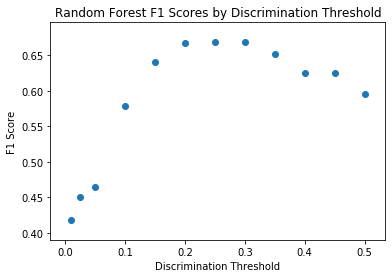

In [1454]:
#Plotting RF F1 scores by discrimination threshold
plt.scatter(thresh_list,f1_score_rev_RF)
plt.xlabel('Discrimination Threshold')
plt.ylabel('F1 Score')
plt.title('Random Forest F1 Scores by Discrimination Threshold')
plt.show()